In [33]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2018 lightning strike dataset.

lightning_raw = pd.read_csv("./Raw_data/eda_datasets/Files/eda_using_basic_data_functions_in_python_dataset1.csv")
lightning_raw.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [3]:
lightning_raw.shape

(3401012, 3)

In [4]:
lightning_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [3]:
# Convert Date column into a date_time column
lightning_raw["date"] = pd.to_datetime(lightning_raw["date"])
lightning_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [6]:
lightning_raw.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [9]:
# Check for the days with more lightning strikes
lightning_raw.groupby("date")["number_of_strikes"].sum().sort_values(ascending= False)

date
2018-08-29    1070457
2018-08-17     969774
2018-08-28     917199
2018-08-27     824589
2018-08-30     802170
               ...   
2018-01-31        130
2018-01-01         91
2018-01-06         57
2018-12-24         32
2018-02-01          7
Name: number_of_strikes, Length: 357, dtype: int64

In [11]:
# get the month for that date
lightning_raw["month"] = lightning_raw["date"].dt.month
lightning_raw.head(15)

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1
5,2018-01-03,119,POINT(-78 28),1
6,2018-01-03,35,POINT(-79.3 28),1
7,2018-01-03,60,POINT(-79.1 28),1
8,2018-01-03,41,POINT(-78.7 28),1
9,2018-01-03,119,POINT(-78.6 28),1


In [22]:
# total strikes per month

monthly_strikes = lightning_raw.groupby("month",as_index=False)["number_of_strikes"].sum()
monthly_strikes = monthly_strikes.sort_values(by="number_of_strikes",ascending= False)
monthly_strikes

,month,number_of_strikes
7,8,15525255
6,7,8320400
5,6,6445083
4,5,4166726
8,9,3018336
1,2,2071315
3,4,1524339
9,10,1093962
0,1,860045
2,3,854168


In [32]:
lightning_raw["month_name_short"] = lightning_raw["date"].dt.month_name().str.slice(stop=3)
lightning_raw["month_name"] = lightning_raw["date"].dt.month_name()
lightning_raw.head()

,date,number_of_strikes,center_point_geom,month,month_name,month_name_short
0,2018-01-03,194,POINT(-75 27),1,January,Jan
1,2018-01-03,41,POINT(-78.4 29),1,January,Jan
2,2018-01-03,33,POINT(-73.9 27),1,January,Jan
3,2018-01-03,38,POINT(-73.8 27),1,January,Jan
4,2018-01-03,92,POINT(-79 28),1,January,Jan


In [37]:
monthly_strikes = lightning_raw.groupby(["month","month_name","month_name_short"],as_index=False)["number_of_strikes"].sum()
monthly_strikes = monthly_strikes.rename(columns={"number_of_strikes" : "total_strikes"})
monthly_strikes = monthly_strikes.sort_values(by="total_strikes",ascending=False)
monthly_strikes


,month,month_name,month_name_short,total_strikes
7,8,August,Aug,15525255
6,7,July,Jul,8320400
5,6,June,Jun,6445083
4,5,May,May,4166726
8,9,September,Sep,3018336
1,2,February,Feb,2071315
3,4,April,Apr,1524339
9,10,October,Oct,1093962
0,1,January,Jan,860045
2,3,March,Mar,854168


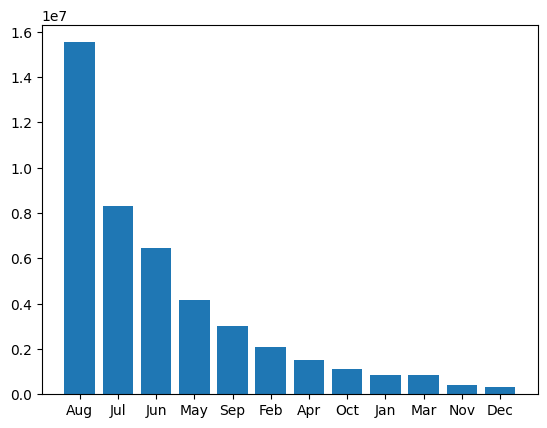

In [41]:
plt.bar(x= monthly_strikes["month_name_short"],height= monthly_strikes["total_strikes"])
plt.plot()

plt.show()

*** 

## Date String Manipulation

In [9]:
lightning_raw = pd.read_csv("./Raw_data/eda_datasets/Files/eda_manipulate_date_strings_with_python.csv")
lightning_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


In [10]:
# The date column is an object
# Change the data type to datetime64

lightning_raw["date"] = pd.to_datetime(lightning_raw["date"])
lightning_raw.info()

lightning_raw = lightning_raw.sort_values(by = "date").reset_index(drop= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 239.8+ MB


In [11]:
lightning_raw.head(15)

,date,number_of_strikes,center_point_geom
0,2016-01-01,1,POINT(-88.9 28.8)
1,2016-01-01,1,POINT(-73.1 34.9)
2,2016-01-01,1,POINT(-75.5 34)
3,2016-01-01,1,POINT(-72.4 35.2)
4,2016-01-01,1,POINT(-52 43.9)
5,2016-01-01,1,POINT(-93.5 23.9)
6,2016-01-01,1,POINT(-80.5 33.1)
7,2016-01-01,1,POINT(-95.5 30.2)
8,2016-01-01,1,POINT(-66.4 37.5)
9,2016-01-01,1,POINT(-77.8 20.4)


In [12]:
#Create 4 new columns

lightning_raw["week"] = lightning_raw["date"].dt.strftime("%V")
lightning_raw["month"] = lightning_raw["date"].dt.strftime("%Y-%m")
lightning_raw["quarter"] = lightning_raw["date"].dt.to_period("Q").dt.strftime("%Y-Q%q")
lightning_raw["year"] = lightning_raw["date"].dt.strftime("%Y")

lightning_raw

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-01-01,1,POINT(-88.9 28.8),53,2016-01,2016-Q1,2016
1,2016-01-01,1,POINT(-73.1 34.9),53,2016-01,2016-Q1,2016
2,2016-01-01,1,POINT(-75.5 34),53,2016-01,2016-Q1,2016
3,2016-01-01,1,POINT(-72.4 35.2),53,2016-01,2016-Q1,2016
4,2016-01-01,1,POINT(-52 43.9),53,2016-01,2016-Q1,2016
...,...,...,...,...,...,...,...
10478998,2018-12-31,7,POINT(-90.4 31.4),01,2018-12,2018-Q4,2018
10478999,2018-12-31,2,POINT(-88.4 35.3),01,2018-12,2018-Q4,2018
10479000,2018-12-31,2,POINT(-88.2 35.2),01,2018-12,2018-Q4,2018
10479001,2018-12-31,4,POINT(-96.7 34.7),01,2018-12,2018-Q4,2018


In [30]:
lightning_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   week               object        
 4   month              object        
 5   quarter            object        
 6   year               object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 181.6+ MB


In [13]:
lightning_raw_2018 = lightning_raw[ lightning_raw["year"] == "2018"] # Since year is an object, should be compared as a string
lightning_2018_per_wk = lightning_raw_2018.groupby("week",as_index= False)["number_of_strikes"].sum()
lightning_2018_per_wk

,week,number_of_strikes
0,01,34843
1,02,353425
2,03,37132
3,04,412772
4,05,34972
5,06,568417
6,07,60847
7,08,1347198
8,09,94082
9,10,196358


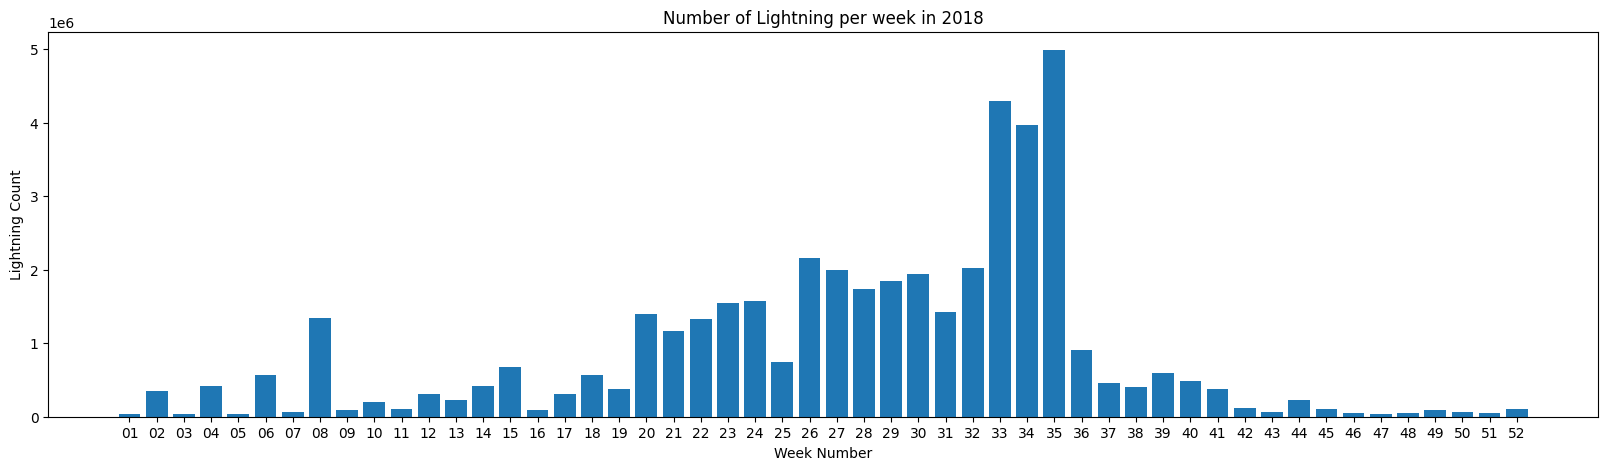

In [14]:
# Plot the total count of lightning
plt.figure(figsize=(20,5))
plt.bar(x=lightning_2018_per_wk["week"] ,height= lightning_2018_per_wk["number_of_strikes"])
plt.title("Number of Lightning per week in 2018")
plt.xlabel("Week Number")
plt.ylabel("Lightning Count")
plt.show()

In [15]:
# Transform the total lightning into Millions
lightning_per_q = lightning_raw.groupby("quarter")["number_of_strikes"].sum().reset_index()
lightning_per_q["number_of_strikes_millions"] = (lightning_per_q["number_of_strikes"]/1000000).round(2)
lightning_per_q


,quarter,number_of_strikes,number_of_strikes_millions
0,2016-Q1,2683798,2.68
1,2016-Q2,15084857,15.08
2,2016-Q3,21843820,21.84
3,2016-Q4,1969754,1.97
4,2017-Q1,2444279,2.44
5,2017-Q2,13548585,13.55
6,2017-Q3,17277461,17.28
7,2017-Q4,1824870,1.82
8,2018-Q1,3785528,3.79
9,2018-Q2,12136148,12.14


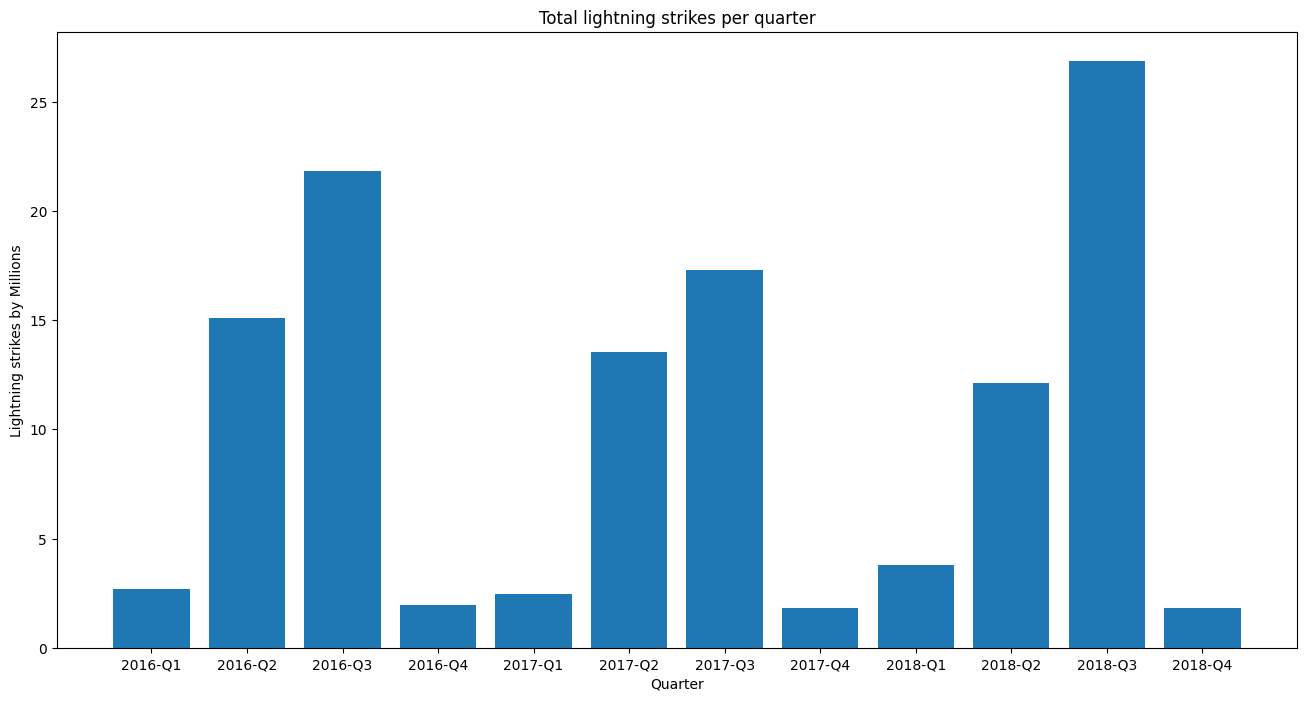

In [16]:
plt.figure(figsize = (16,8))
plt.bar(x=lightning_per_q["quarter"],height=lightning_per_q["number_of_strikes_millions"])
plt.title("Total lightning strikes per quarter")
plt.xlabel("Quarter")
plt.ylabel("Lightning strikes by Millions")
plt.show()

In [22]:
#Create a function to add labels over the bars 

def bar_label(x,y,label):
    for d_point in range(len(x)):
        print(d_point, y[d_point],label[d_point])
        plt.text(d_point, y[d_point],label[d_point], ha="center", va='bottom')

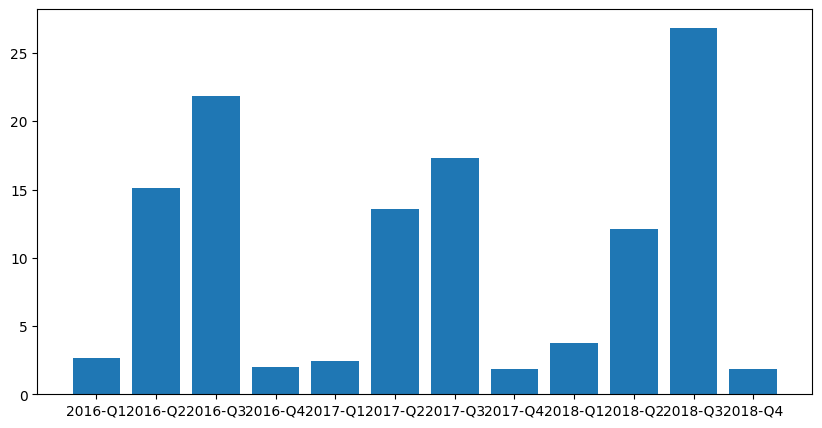

0 2.68 2.68
1 15.08 15.08
2 21.84 21.84
3 1.97 1.97
4 2.44 2.44
5 13.55 13.55
6 17.28 17.28
7 1.82 1.82
8 3.79 3.79
9 12.14 12.14
10 26.86 26.86
11 1.82 1.82


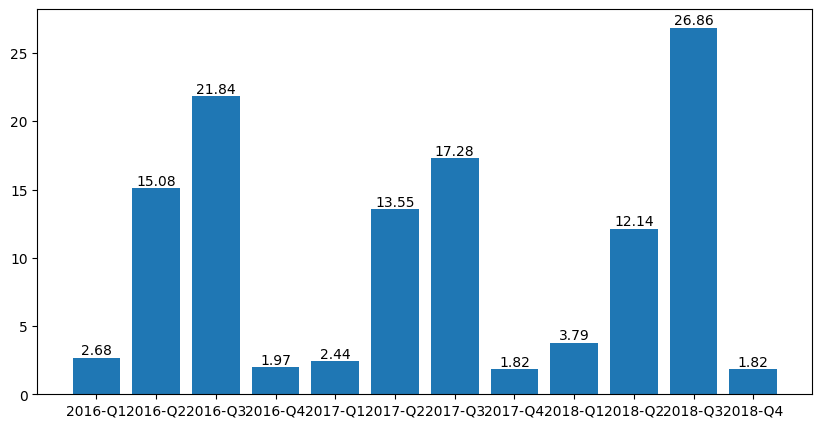

0 2.68 2.68
1 15.08 15.08
2 21.84 21.84
3 1.97 1.97
4 2.44 2.44
5 13.55 13.55
6 17.28 17.28
7 1.82 1.82
8 3.79 3.79
9 12.14 12.14
10 26.86 26.86
11 1.82 1.82


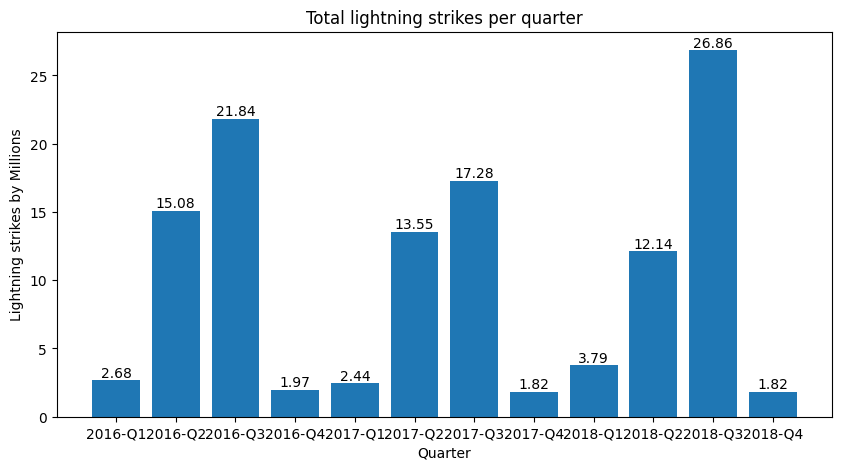

In [28]:
plt.figure(figsize = (10,5))
plt.bar(x=lightning_per_q["quarter"],height=lightning_per_q["number_of_strikes_millions"])
plt.show()
#*******************
plt.figure(figsize = (10,5))
plt.bar(x=lightning_per_q["quarter"],height=lightning_per_q["number_of_strikes_millions"])
bar_label(lightning_per_q["quarter"], lightning_per_q["number_of_strikes_millions"], lightning_per_q["number_of_strikes_millions"])
plt.show()
#*******************
plt.figure(figsize = (10,5))
plt.bar(x=lightning_per_q["quarter"],height=lightning_per_q["number_of_strikes_millions"])
bar_label(lightning_per_q["quarter"], lightning_per_q["number_of_strikes_millions"], lightning_per_q["number_of_strikes_millions"])
plt.title("Total lightning strikes per quarter")
plt.xlabel("Quarter")
plt.ylabel("Lightning strikes by Millions")
plt.show()


***

### Create a chart with sbn 
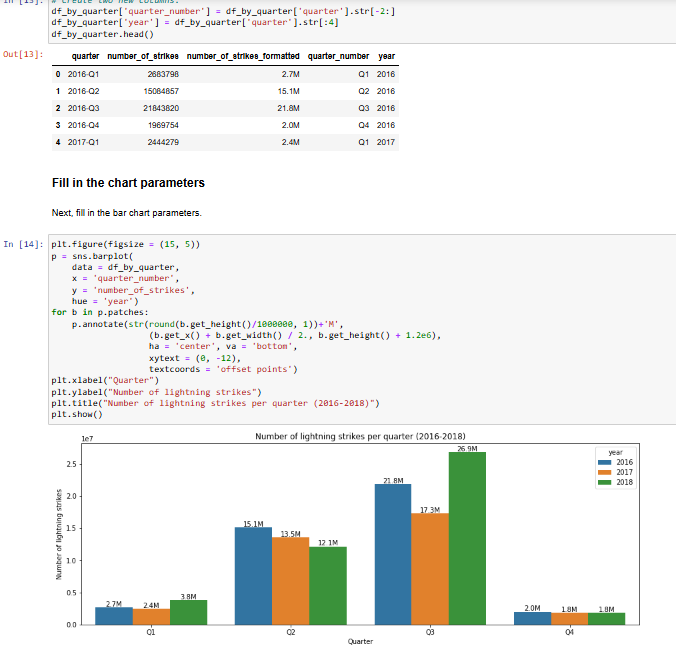

In [30]:
lightning_per_q.head(10)

,quarter,number_of_strikes,number_of_strikes_millions
0,2016-Q1,2683798,2.68
1,2016-Q2,15084857,15.08
2,2016-Q3,21843820,21.84
3,2016-Q4,1969754,1.97
4,2017-Q1,2444279,2.44
5,2017-Q2,13548585,13.55
6,2017-Q3,17277461,17.28
7,2017-Q4,1824870,1.82
8,2018-Q1,3785528,3.79
9,2018-Q2,12136148,12.14


In [32]:
lightning_per_q["n_stk_M_format"] = lightning_per_q["number_of_strikes_millions"].astype(str) + " M"
lightning_per_q["year"] = lightning_per_q["quarter"].str[:4]
lightning_per_q["Q-name"] = lightning_per_q["quarter"].str[-2:]
lightning_per_q

,quarter,number_of_strikes,number_of_strikes_millions,n_stk_M_format,year,Q-name
0,2016-Q1,2683798,2.68,2.68 M,2016,Q1
1,2016-Q2,15084857,15.08,15.08 M,2016,Q2
2,2016-Q3,21843820,21.84,21.84 M,2016,Q3
3,2016-Q4,1969754,1.97,1.97 M,2016,Q4
4,2017-Q1,2444279,2.44,2.44 M,2017,Q1
5,2017-Q2,13548585,13.55,13.55 M,2017,Q2
6,2017-Q3,17277461,17.28,17.28 M,2017,Q3
7,2017-Q4,1824870,1.82,1.82 M,2017,Q4
8,2018-Q1,3785528,3.79,3.79 M,2018,Q1
9,2018-Q2,12136148,12.14,12.14 M,2018,Q2


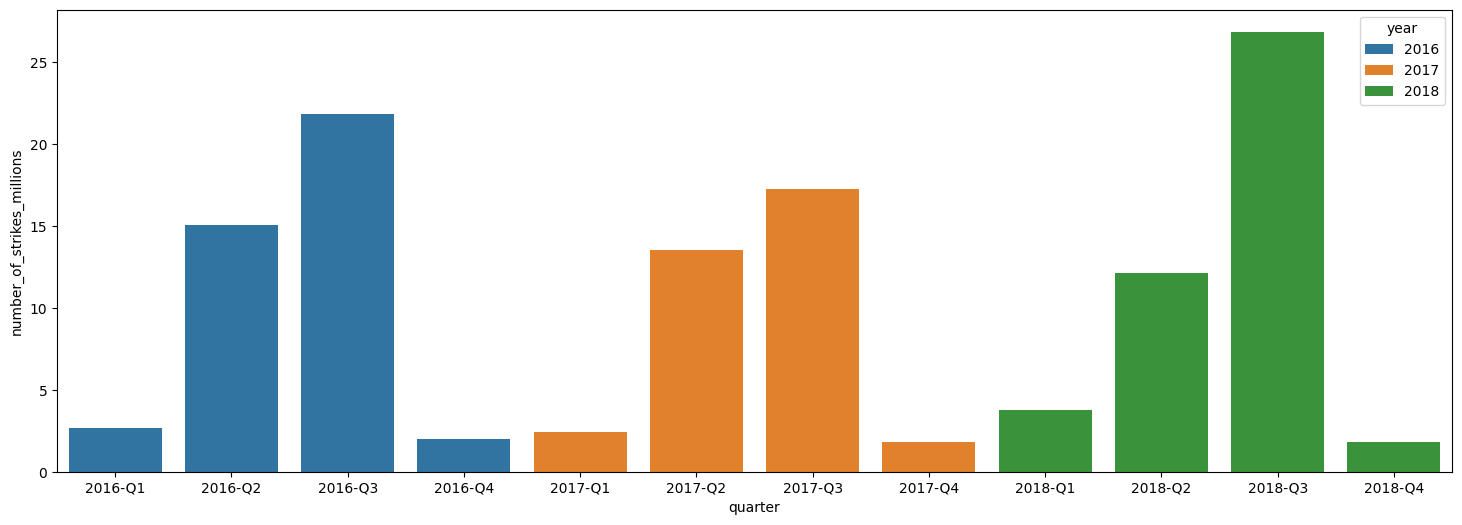

In [35]:
plt.figure(figsize=(18,6))
p = sns.barplot(
    data= lightning_per_q,
    x = "quarter",
    y= "number_of_strikes_millions",
    hue = "year"
)
plt.show()